In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')
#importing required libraries

In [55]:
df = pd.read_csv ('emp_health.csv' )
#importing data from csv file

In [56]:
df.head()
#some rows of the dataset

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [57]:
df.info()
# datatype of all features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [58]:
df.describe()
# statistical properties of the dataframe

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [59]:
emp_smoke50=df[(df['age']>50) & (df['smoke']== 'yes')] #creating data frame with employess afbove 50 and who smoke
emp_smoke50['expenditure'].mean() #calculating the average expenditure of employees

38820.22308234375

# 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [60]:
emp_female =df[df['sex']=='female']
emp_female['id'].count()
proportion = round(453/662*100,2)
print(proportion,'%')

68.43 %


# 3. Display zone wise average expenditure of employees on health

In [61]:
avg_exp=pd.pivot_table(data=df,index='zone',values='expenditure',aggfunc=np.sum)
avg_exp

,expenditure
zone,
east,3.608966e+06
north,9.871808e+05
northeast,1.013409e+06
northwest,1.761997e+06
south,1.236118e+06
southeast,2.861684e+06
southwest,3.191988e+06
west,3.094482e+06


# 4. Employees of which zone did maximum expenditure on health

In [62]:
df.groupby(by='zone').sum().sort_values(by='expenditure',ascending=False).head(1)

,age,bmi,dependent,expenditure
zone,,,,
east,10161,7987.26,254,3.608966e+06


# 5. What is the minimum expenditure done by any employee in organization

In [63]:
min_exp=df['expenditure'].min()
print('$',min_exp)

$ 1121.8739


# 6. What is average expenditure of employees who have 2 or lesser dependents
 

In [64]:
emp_dep2=df[(df['dependent']<=2)]
emp_dep2_avg=emp_dep2['expenditure'].mean()
emp_dep2_avg

13040.970970948145

# 7. How many employees are below age of 20 years. What is their average BMI
 

In [65]:
emp_below_20=df[(df['age']<20)]
emp_below_20_avg=emp_below_20['bmi'].mean()
emp_below_20_avg

29.971496350364966

# 8. Create a dataframe "non_smoker" for all non-smoker male employees


In [66]:
non_smoker=df[(df['sex']== 'male') & (df['smoke']== 'no')]
non_smoker.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070


# 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol
 


In [67]:
non_alcoholic=df[(df['sex']== 'male') & (df['alcohol']== 'no')]
non_alcoholic.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630


# 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol.
The dataframe should contain columns id, smoke, alcohol

In [68]:
non_smoking_alcoholic=non_smoker.join(non_alcoholic.set_index(['id','smoke','alcohol']),on=['id','smoke','alcohol'],how='inner',lsuffix='_x',rsuffix='_y').loc[:,['id','smoke','alcohol']]
non_smoking_alcoholic

,id,smoke,alcohol
18,i10030,no,no
24,i10036,no,no
28,i10040,no,no
37,i10049,no,no
67,i10079,no,no
...,...,...,...
1261,i11273,no,no
1270,i11282,no,no
1310,i11322,no,no
1320,i11332,no,no


# 11.What is the count for each zone with respect to number of dependent

In [69]:
health_zone =df.groupby(['zone','dependent'])['id'].count() #groupby is used to group data by zone and dependents and count function counts the number of people in each zone
emp_health_zone = health_zone.reset_index()
emp_health_zone = emp_health_zone.rename(columns={'id':'count'})
emp_health_zone

,zone,dependent,count
0,east,0,124
1,east,1,65
2,east,2,42
3,east,3,22
4,east,4,6
5,east,5,3
6,north,0,26
7,north,1,20
8,north,2,10
9,north,3,12


# 12. Classify the employees into 3 categories.
 #Category 1 : employees below 18.5 bmi - underweight
 #Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
 #Category 3 : employee with bmi over 24.9 - overweight
 #What is the average expenditure of employees in each category.
 #Display the bar chart for the same

In [70]:
emp_underweight = df[df['bmi']<18.5]
emp_underweight['id'].count()
#underweight is calculated

20

In [71]:
emp_underweight_exp = emp_underweight['expenditure'].mean()
emp_underweight_exp
#avg is calculated

8852.200585000002

In [72]:
emp_fit = df[(df['bmi']>=18.5) & (df['bmi']<=24.9)]
emp_fit['id'].count()
#no of fit people is calculated

222

In [73]:
emp_fit_exp = emp_fit['expenditure'].mean()
emp_fit_exp
# fit employee expinditure average

10379.499732162163

In [74]:
emp_overweight = df[df['bmi']>24.9]
emp_overweight['id'].count()
#overweight people are calculated

1096

In [75]:
emp_overweight_exp = emp_overweight['expenditure'].mean()
emp_overweight_exp
#average of overweight people with respect to expenditure

13936.616823466235

In [76]:
bmi_type =['Underweight','Fit','Overweight']
exp_list=[emp_underweight_exp,emp_fit_exp,emp_overweight_exp]
df_chart_exp_bmi = pd.DataFrame(list(zip(bmi_type,exp_list)),columns=['BMI_Category','Average_Expenditure'])
df_chart_exp_bmi
#dataframe is created with respect to bmi categories and expenditure

,BMI_Category,Average_Expenditure
0,Underweight,8852.200585
1,Fit,10379.499732
2,Overweight,13936.616823


<AxesSubplot:xlabel='BMI_Category', ylabel='Average_Expenditure'>

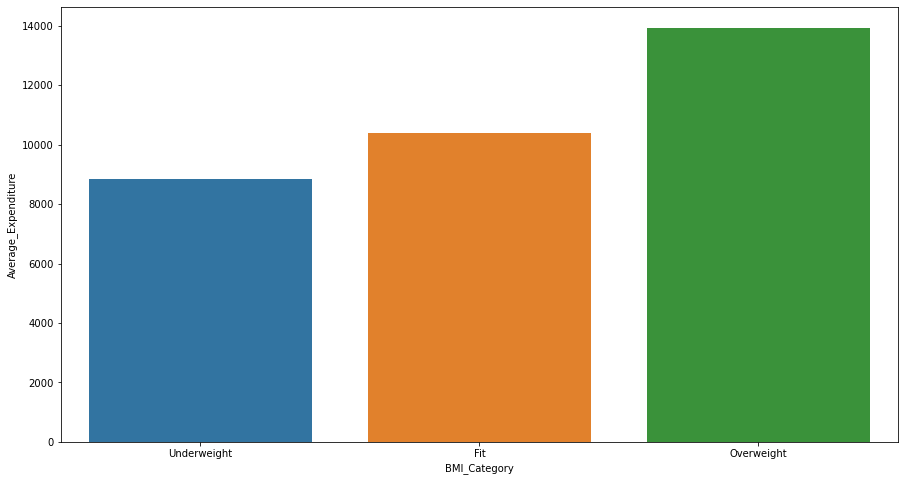

In [77]:
plt.figure(figsize=(15,8))
sns.barplot(x='BMI_Category',y='Average_Expenditure',data=df_chart_exp_bmi)

# 13. Draw line plot of expenditure against age and BMI


<AxesSubplot:xlabel='age', ylabel='expenditure'>

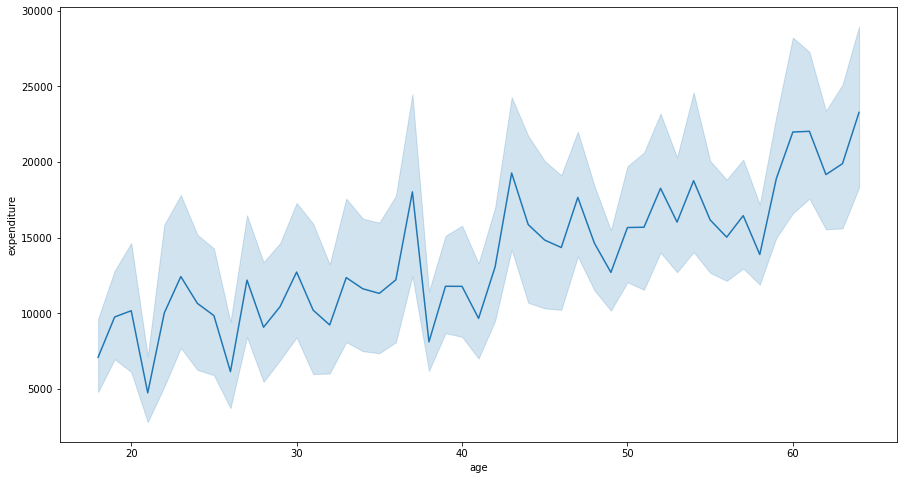

In [78]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='age',y='expenditure')

<AxesSubplot:xlabel='bmi', ylabel='expenditure'>

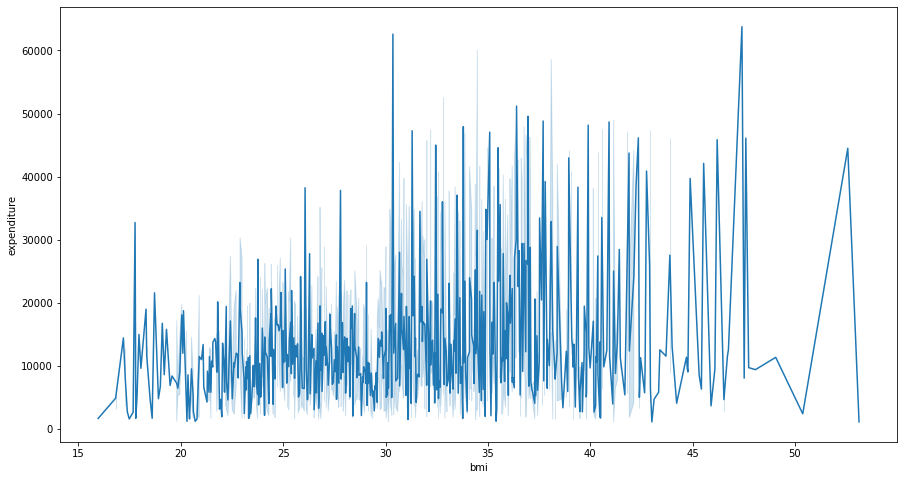

In [79]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='bmi',y='expenditure')

# 14. Draw a bar chart to show zone wise average expenditure

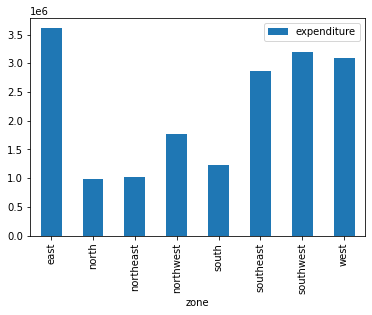

In [80]:
avg_exp=pd.pivot_table(data=df,index='zone',values='expenditure',aggfunc=np.sum)
ax =avg_exp.plot.bar(stacked=True)

# 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

<AxesSubplot:xlabel='alcohol', ylabel='expenditure'>

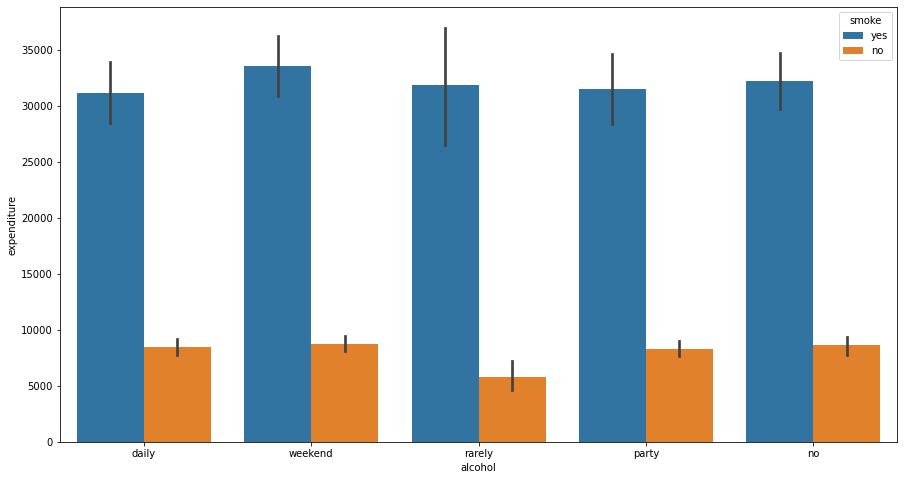

In [81]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='alcohol',y='expenditure',hue='smoke')

# 16. Draw pie chart for alcohol consumption habits

In [82]:
alcohol_cons = df.groupby(by='alcohol')['id'].count() #count is used to count the number of alcohol consumption habit
alcohol_cons

alcohol
daily      395
no         259
party      278
rarely      59
weekend    347
Name: id, dtype: int64

In [83]:
alcohol_cons = alcohol_cons.reset_index() #index is reset
alcohol_cons = alcohol_cons.rename(columns={'id':'count'}) #new dict is created
alcohol_cons

,alcohol,count
0,daily,395
1,no,259
2,party,278
3,rarely,59
4,weekend,347


In [84]:
px.pie(alcohol_cons,names='alcohol',values='count')

# 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

<AxesSubplot:xlabel='age', ylabel='expenditure'>

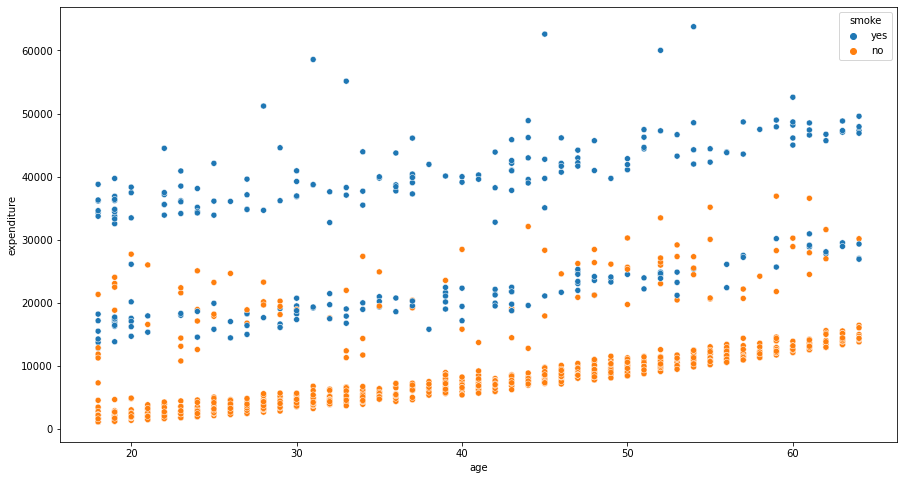

In [85]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='age',y='expenditure',hue='smoke')

# 18. Draw distribution plot of expenditure

<AxesSubplot:xlabel='expenditure', ylabel='Density'>

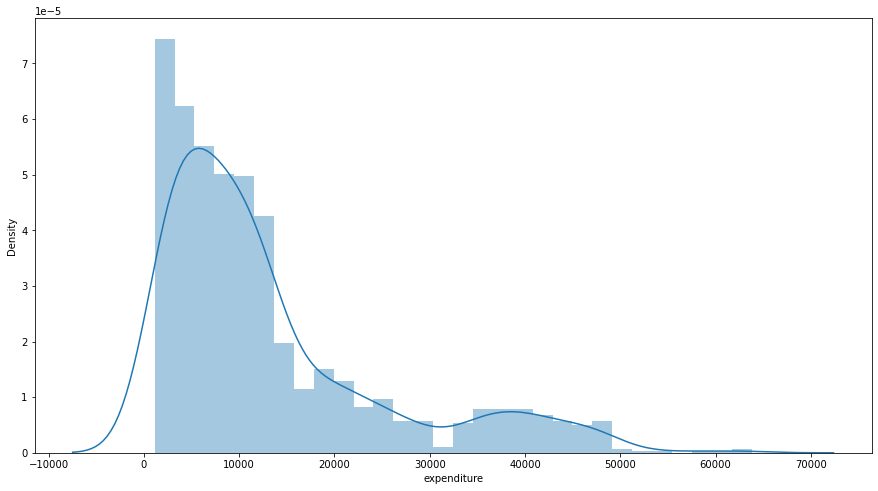

In [86]:
plt.figure(figsize=(15,8))
sns.distplot(df['expenditure'])

# 19. Display the pairplot

<Figure size 1080x576 with 0 Axes>

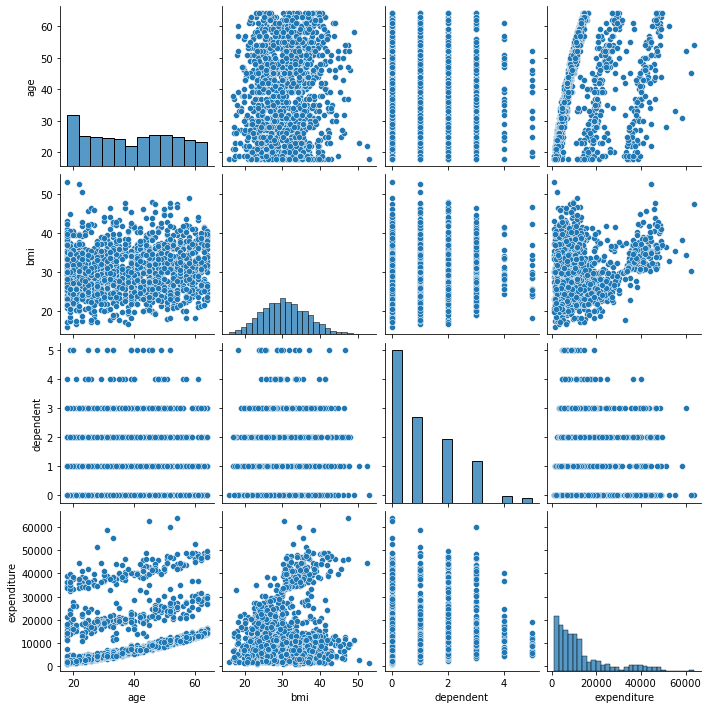

In [87]:
plt.figure(figsize=(15,8))
sns.pairplot(data=df)

# 20. Display heatmap for the data

<AxesSubplot:>

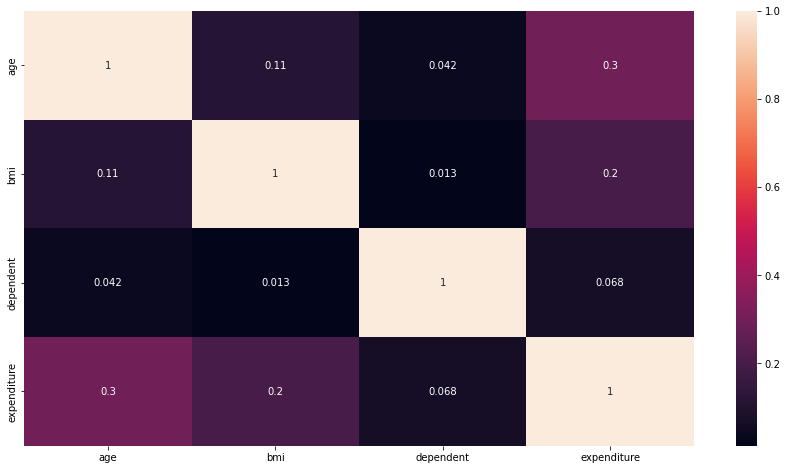

In [88]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)